# importing all the required libraries

In [3]:
import numpy as np #numpy arrays
import pandas as pd
import matplotlib.pyplot as plt #graphs and ccharts
import seaborn as ss #data visualization
from sklearn.model_selection import train_test_split #spliting the data into test train(80:20)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# PREPROCESSED STEPS
        1.A new column was added in both files(through excel) named wine_type to identify if its red wine or whitewine,
             after merging both files(11=white wine,12=red wine)
        2.both files were of different size,which is trimmed to same size
        3.two different files(Red wine & White wine)were concatanated into one dataframe named result
        


# Data reading using pandas frame

In [4]:
rwine_data=pd.read_csv('C:/Users/USER/Pictures/data/winequality_red.csv')
rwine_data.shape #no.of rows and col
print(rwine_data['wine_type'])

0       12
1       12
2       12
3       12
4       12
        ..
1594    12
1595    12
1596    12
1597    12
1598    12
Name: wine_type, Length: 1599, dtype: int64


In [5]:
wwine_data=pd.read_csv('C:/Users/USER/Pictures/data/winequality_white.csv')
wwine_data=wwine_data[0:1599] #no.of rows and col
print(wwine_data.shape)

(1599, 13)


# APPENDING BOTH DATASETS IN ONE FRAME

In [6]:
frames = [rwine_data,wwine_data]
result = pd.concat(frames)

In [7]:
result.shape

(3198, 13)

In [8]:
print(result)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            7.0              0.29         0.49             3.8      0.047   
1595            6.4              0.27         0.49             7.3      0.046   
1596            6.6              0.55         0.01             2.7      0.034   
1597            6.4              0.27         0.49             7.3      0.046   
1598            6.3              0.24         0.74             1.4      0.172   

      free sulfur dioxide  

# Data Understanding  
CHECKING FOR NULL VALUES,DATA TYPES AND UNIQUES VALUES

In [116]:
print(result.shape)
result.isnull().sum() #checking missing values   

(3198, 13)


volatile acidity         0
citric acid              0
chlorides                0
density                  0
pH                       0
sulphates                0
alcohol                  0
wine_type                0
quality                  0
fixed_acidity            0
residual_sugar           0
free_sulphur_di_oxide    0
Sulphur_di_oxide         0
dtype: int64

In [10]:
result.nunique()

fixed acidity            98
volatile acidity        171
citric acid              84
residual sugar          228
chlorides               188
free sulfur dioxide      99
total sulfur dioxide    258
density                 501
pH                       98
sulphates               108
alcohol                  69
wine_type                 2
quality                   7
dtype: int64

In [11]:
result.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
wine_type                 int64
quality                   int64
dtype: object

# plotting histogram to see the distribution of each column

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'wine_type'}>],
       [<Axes: title={'center': 'quality'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

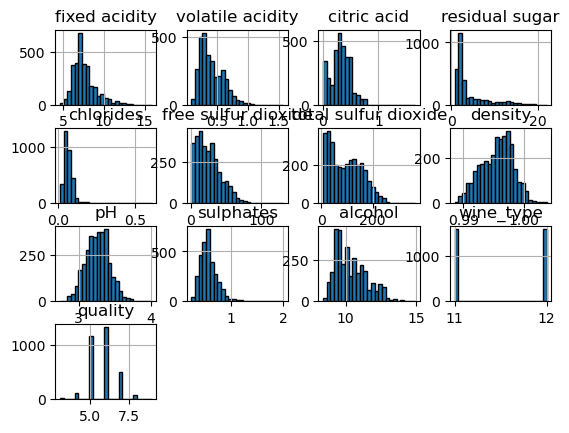

In [12]:
result.hist(edgecolor='black',bins=25)   
#Pandas.DataFrame.hist() function is useful in understanding the distribution of numeric variables

# 
As the distributions are not normal for some columns we will normalize them using min_max method

# Feature Engineering

#converting the columns which are not normally distributed to numpy array

In [13]:
acid=np.asarray(result['fixed acidity'])
resid=np.asarray(result['residual sugar'])
free=np.asarray(result['free sulfur dioxide'])
sulfur=np.asarray(result['total sulfur dioxide'])

# defining a function to convert values between 0-1 using min_max techniques

In [14]:
def min_max(array):
    mini=min(array)
    maxi=max(array)
    for i in range(len(array)):
        array[i]=(array[i]-mini)/(maxi-mini)
    
min_max(acid) 
min_max(resid)
min_max(free)
min_max(sulfur)

#Dropping the previous columns and adding new columns with normalized values

In [18]:
result=result.drop(['fixed acidity','residual sugar','free sulfur dioxide','total sulfur dioxide'],axis=1)

In [19]:
result['fixed_acidity']=pd.DataFrame(acid)
result['residual_sugar']=pd.DataFrame(resid)
result['free_sulphur_di_oxide']=pd.DataFrame(free)
result['Sulphur_di_oxide']=pd.DataFrame(sulfur)


#Printing Updated dataset

In [103]:
print(result)

      volatile acidity  citric acid  chlorides  density    pH  sulphates  \
0                 0.70         0.00      0.076   0.9978  3.51       0.56   
1                 0.88         0.00      0.098   0.9968  3.20       0.68   
2                 0.76         0.04      0.092   0.9970  3.26       0.65   
3                 0.28         0.56      0.075   0.9980  3.16       0.58   
4                 0.70         0.00      0.076   0.9978  3.51       0.56   
...                ...          ...        ...      ...   ...        ...   
1594              0.29         0.49      0.047   0.9938  2.95       0.40   
1595              0.27         0.49      0.046   0.9956  3.24       0.43   
1596              0.55         0.01      0.034   0.9906  3.15       0.30   
1597              0.27         0.49      0.046   0.9956  3.24       0.43   
1598              0.24         0.74      0.172   0.9932  3.27       0.39   

      alcohol  wine_type  quality  fixed_acidity  residual_sugar  \
0         9.4      

# 
Updated Histogram

array([[<Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'wine_type'}>],
       [<Axes: title={'center': 'quality'}>,
        <Axes: title={'center': 'fixed_acidity'}>,
        <Axes: title={'center': 'residual_sugar'}>,
        <Axes: title={'center': 'free_sulphur_di_oxide'}>],
       [<Axes: title={'center': 'Sulphur_di_oxide'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

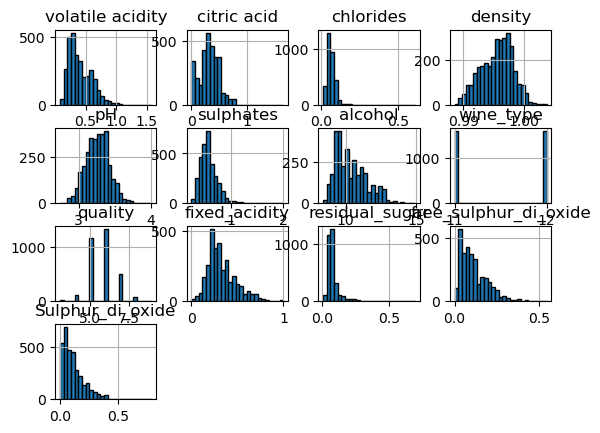

In [21]:
result.hist(edgecolor='black',bins=25) #updated histogram

#
Displaying both files statisticals values seperately

In [22]:
wwine_data.describe()   #statistical methods

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.00000,1599.000000,1599.000000,1599.0,1599.000000
mean,7.016948,0.280210,0.363615,6.047029,0.046440,34.895560,143.744528,0.994389,3.20666,0.487455,10.285241,11.0,5.874922
std,0.879253,0.103262,0.139089,4.995919,0.023196,16.427488,44.196631,0.002684,0.15662,0.115761,1.123966,0.0,0.935660
min,4.800000,0.080000,0.000000,0.800000,0.017000,3.000000,19.000000,0.988600,2.74000,0.250000,8.500000,11.0,3.000000
25%,6.400000,0.210000,0.280000,1.600000,0.037000,23.000000,113.000000,0.992350,3.09000,0.400000,9.400000,11.0,5.000000
50%,7.000000,0.260000,0.350000,4.700000,0.044000,34.000000,143.000000,0.994000,3.19000,0.470000,10.100000,11.0,6.000000
75%,7.500000,0.320000,0.430000,9.400000,0.050000,46.000000,172.000000,0.996500,3.31000,0.550000,11.000000,11.0,6.000000
max,14.200000,0.905000,1.660000,22.000000,0.346000,131.000000,366.500000,1.001200,3.82000,0.970000,14.000000,11.0,9.000000


In [23]:
rwine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.0,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,12.0,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.0,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,12.0,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,12.0,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,12.0,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,12.0,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,12.0,8.000000


# DATA ANALYSIS & Visualize

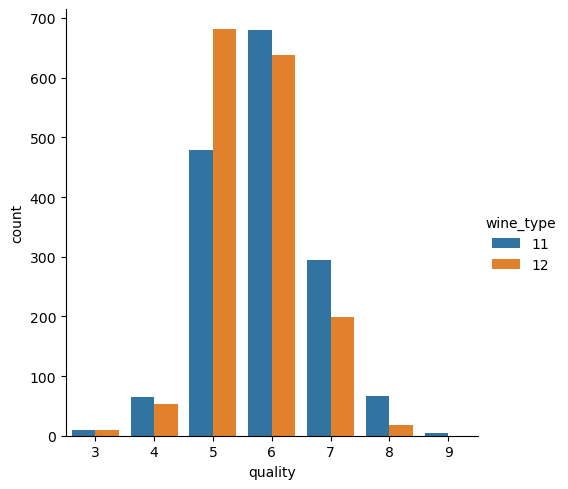

In [26]:
#Quality check
ss.catplot(x='quality',data=result,kind='count',hue='wine_type')  #catplot shows frequencies (or optionally fractions or percents) of the categories of one, two or three categorical variables)

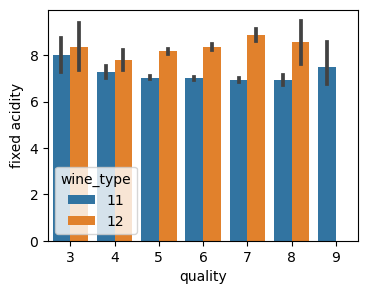

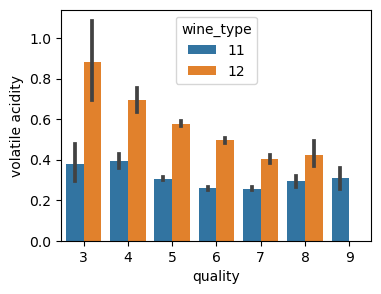

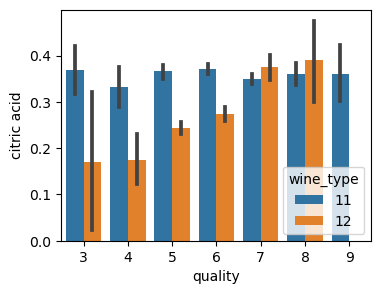

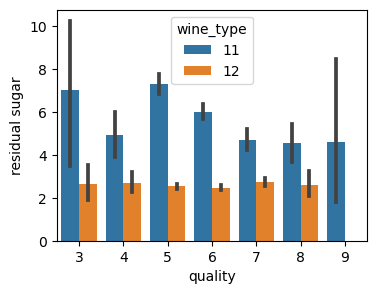

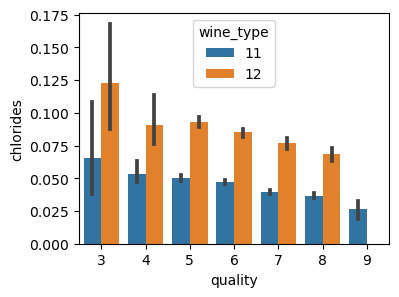

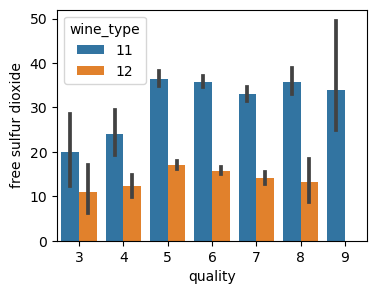

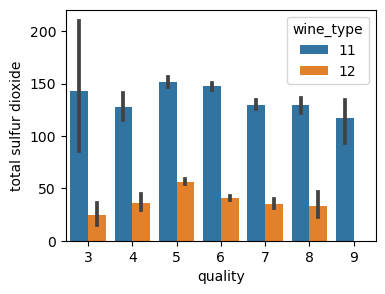

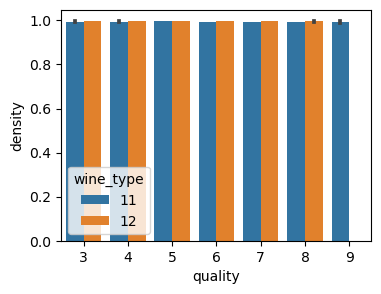

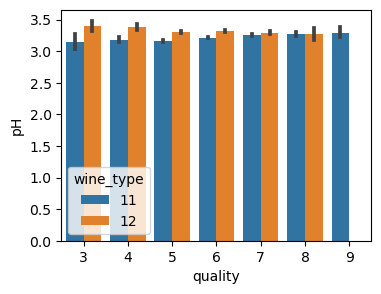

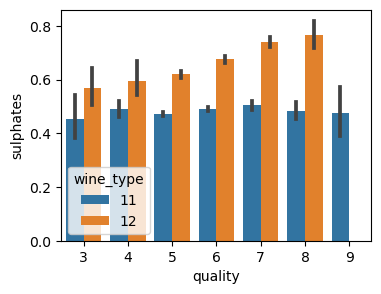

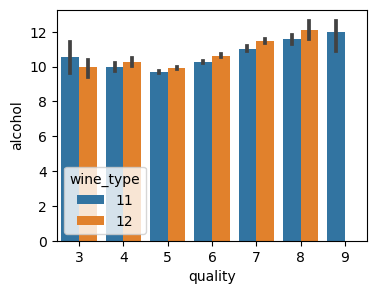

In [27]:
#comparison of columns with quality
arr = np.array(["fixed acidity","volatile acidity","citric acid","residual sugar",
                "chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"])
for i in arr:
    plot=plt.figure(figsize=(4,3))
    ss.barplot(x="quality",y=i,data=result,hue='wine_type')


<Axes: >

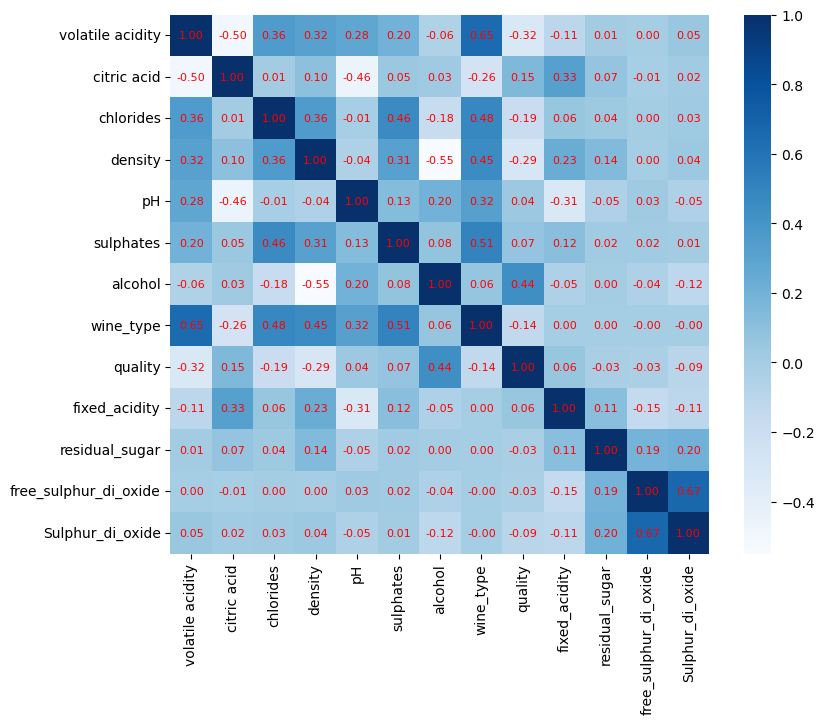

In [28]:
###CORRELATION with quality it is usually presented in heatmap
correlation=result.corr() 
plot2=plt.figure(figsize=(9,7))
ss.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8,'color':'red'},cmap='Blues')

# Model training to predict wine type and wine Quality

#differentiating labels and feature columns

In [29]:
X=result.drop(['wine_type','quality'],axis=1) #if droping row axis=0,droping vol axis=1
Y=result['wine_type']

In [30]:
Z=result['quality']

# Splitting the data into test and train data

In [31]:
#SPLITTING DATA INTO TEST & TRAINING
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=0)

In [33]:
#SPLITTING DATA INTO TEST & TRAINING
Z_train,Z_test=train_test_split(Z,test_size=0.1,random_state=0)

# Applying various machine learning models(Random forest,Gausian Naive Byes,Logistic regressio)

In [32]:
modelR=RandomForestClassifier()

In [34]:
modelR.fit(X_train,Z_train)  #quality of wine

RandomForestClassifier()

In [109]:
from sklearn.naive_bayes import GaussianNB
modelG = GaussianNB()
modelG.fit(X_train,Z_train)

GaussianNB()

In [35]:
modelL=LogisticRegression(solver='liblinear', C=10.0, random_state=1)

In [36]:
modelL.fit(X_train,Y_train) #predicting wine type(white or red wine)

LogisticRegression(C=10.0, random_state=1, solver='liblinear')

# displaying Confusion matrix for logistic Regression

In [37]:

print(classification_report(Y, modelL.predict(X)))

              precision    recall  f1-score   support

          11       0.93      0.92      0.93      1599
          12       0.92      0.93      0.93      1599

    accuracy                           0.93      3198
   macro avg       0.93      0.93      0.93      3198
weighted avg       0.93      0.93      0.93      3198



# predicting models accuracy on train and test data

In [38]:
#model evaluation to predicct wine type
X_train_predict=modelL.predict(X_train)
train_accur=accuracy_score(X_train_predict,Y_train)
print(train_accur)

0.9242529534398888


In [40]:
#accuracy on  wine_type  test data
prediction=modelL.predict(X_test)
accuracy=accuracy_score(prediction,Y_test)

In [39]:
#model evaluation to predicct  wine quality Randome forest
X_train_prediction=modelR.predict(X_train)
train_acc=accuracy_score(X_train_prediction,Z_train)
print(train_acc)

1.0


In [41]:
#accuracy on  quality  test data
predictionR=modelR.predict(X_test)
accuracy_quality=accuracy_score(prediction1,Z_test)

In [110]:
#model evaluation to predicct  wine quality Gausian
X_trainprediction=modelG.predict(X_train)
train_=accuracy_score(X_trainprediction,Z_train)
print(train_)

0.4888811674774149


In [111]:
predictionG=modelG.predict(X_test)
accuracy_qualityy=accuracy_score(predictionG,Z_test)

# printing models accuracy on test data

In [115]:
print('accuracy for quality model \n 1]using random forest',accuracy_quality,'\n 2]using Gaussian Naive Byes',accuracy_qualityy,'\naccuracy for wine type prediction \n 1]using Logistic regression',accuracy)

accuracy for quality model 
 1]using random forest 0.640625 
 2]using Gaussian Naive Byes 0.478125 
accuracy for wine type prediction 
 1]using Logistic regression 0.946875


# TRAINING data using ensemble learning

# defining a function for evaluation of data using multiple models

In [73]:
def evaluate_models(models, X_train, X_test, Z_train, Z_test):
    scores = list()
    for name, model in models:
        model.fit(X_train, Z_train)
        yhat = model.predict(X_test)
        acc = accuracy_score(Z_test, yhat)
        scores.append(acc)
    return scores

In [77]:
from sklearn.ensemble import VotingClassifier

# Putting multiple models used in this project under 1 list

In [89]:
models = list()
models.append(('bayes', GaussianNB()))
models.append(('random',RandomForestClassifier()))

#MODEL ACCURACY CALCULATION ON TRAIN DATA

In [90]:
scores = evaluate_models(models, X_train, X_test, Z_train, Z_test)
print(scores)

[0.478125, 0.63125]


#MODEL ACCURACY CALCULATION ON TEST DATA

In [100]:
ensemble = VotingClassifier(estimators=models, voting='soft')
# fit the ensemble on the training dataset
ensemble.fit(X,Z)
# make predictions on test set
yhat = ensemble.predict(X_test)
# evaluate predictions
score = accuracy_score(yhat,Z_test)
print(' Accuracy: %.3f' % (score*100))

 Accuracy: 90.312


In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
TP=(X_trainprediction+X_train_prediction)/2
print(mean_squared_error(Z_train, TP,multioutput='raw_values'))

[0.18528492]


In [48]:
TF=(predictionS+prediction1)/2
print(mean_squared_error(Z_test, TF,multioutput='raw_values'))

[0.4546875]


# TESTING DATA & MODEL EVALUATION

In [105]:
input_data=( 0.70,0.00,0.076,0.9978,3.51,0.56,9.4,0.247788,0.051887,0.076923,0.077670)
input_data_array=np.asarray(input_data)
in_data=input_data_array.reshape(1,-1)
prediction=modelL.predict(in_data)

prediction1=ensemble.predict(in_data)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# OUTPUT

In [106]:
if(prediction==12):
    print("Red Wine")
    print("Quality is",prediction1)
else:
    print("White wine")
    print("Quality is",prediction1)

Red Wine
Quality is [5]
